In [398]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [399]:
df = pd.read_csv('weather.csv')
print(df.shape)
print(df.iloc[:10, 0:1])

(22064, 29)
  Local time in Kiev / Zhuliany (airport)
0                           2/1/2012 5:00
1                          2/1/2012 11:00
2                          2/1/2012 17:00
3                          2/1/2012 20:00
4                          2/1/2012 23:00
5                           2/2/2012 2:00
6                           2/2/2012 8:00
7                          2/2/2012 11:00
8                          2/2/2012 14:00
9                          2/2/2012 17:00


In [400]:
non_catogorical=df.describe().columns
col_list=df.columns
for x in col_list:
    if x in non_catogorical:
        col_list=col_list.drop(x)
col_list

Index(['Local time in Kiev / Zhuliany (airport)', 'DD', 'WW', 'W1', 'W2', 'Cl',
       'H', 'Cm', 'Ch', 'VV', 'E', 'E'', 'sss'],
      dtype='object')

In [401]:
print(type(df["Local time in Kiev / Zhuliany (airport)"][0]))
df["Local time in Kiev / Zhuliany (airport)"] = pd.to_datetime(df["Local time in Kiev / Zhuliany (airport)"])
type(df["Local time in Kiev / Zhuliany (airport)"][0])

<class 'str'>


pandas._libs.tslibs.timestamps.Timestamp

In [402]:
for i in df.columns:
    if df[i].dtype != int and df[i].dtype != float:
        print(i,df[i][0])

Local time in Kiev / Zhuliany (airport) 2012-02-01 05:00:00
DD Wind blowing from the north-east
WW Diamond dust (with or without fog), 
W1 Cloud covering 1/2 or less of the sky throughout the appropriate period,
W2 Cloud covering 1/2 or less of the sky throughout the appropriate period,
Cl nan
H no_cloud
Cm nan
Ch nan
VV 20
E nan
E' nan
sss nan


In [403]:
type(df['VV'][0])

str

In [404]:
index_list=df[df['VV'].str.match(r"^[a-zA-Z]") == True].index
for i in index_list:
    df['VV'][i]=str(0)

C:\Users\venka\AppData\Local\Temp\ipykernel_10756\2707055126.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VV'][i]=str(0)


In [405]:
df['VV'] = df['VV'].astype(float)

In [406]:
#check catogorical data columns

In [407]:
non_catogorical=df.describe().columns
df_numeric=df[non_catogorical]
df_numeric=pd.concat([df_numeric, df["Local time in Kiev / Zhuliany (airport)"]], axis=1)

In [408]:
df_numeric.describe()

,T,Po,P,Pa,U,Ff,ff10,ff3,N,Tn,Tx,Nh,VV,Td,RRR,tR,Tg
count,22061.000000,22054.000000,22053.000000,18862.000000,22057.000000,22061.000000,4.00,18.000000,22064.000000,2730.000000,2754.000000,22064.000000,22054.000000,22060.000000,2297.000000,3287.000000,285.000000
mean,9.628811,747.309608,762.521095,0.000573,70.764338,2.555777,18.25,18.500000,0.614843,6.105788,13.660167,0.487677,15.558209,3.728432,3.095429,9.490113,1.600000
std,10.575506,6.125991,6.413827,0.788735,19.788044,1.446329,0.50,0.707107,0.393978,9.126254,11.684076,0.424372,6.952456,8.473699,4.664988,2.960145,3.265483
min,-26.700000,719.900000,734.800000,-5.100000,12.000000,0.000000,18.00,18.000000,0.000000,-26.800000,-18.000000,0.000000,0.000000,-29.700000,0.100000,6.000000,-8.000000
25%,1.100000,743.425000,758.400000,-0.500000,56.000000,2.000000,18.00,18.000000,0.250000,-0.300000,3.400000,0.000000,10.000000,-2.000000,0.500000,6.000000,0.000000
50%,9.500000,747.000000,762.000000,0.000000,75.000000,2.000000,18.00,18.000000,0.750000,6.500000,14.000000,0.500000,20.000000,3.800000,1.000000,12.000000,2.000000
75%,18.300000,751.100000,766.400000,0.500000,87.000000,3.000000,18.25,19.000000,1.000000,14.000000,24.100000,1.000000,20.000000,10.600000,4.000000,12.000000,4.000000
max,36.600000,770.800000,788.200000,4.600000,100.000000,10.000000,19.00,20.000000,1.000000,23.600000,37.600000,1.000000,20.000000,22.000000,41.000000,12.000000,16.000000


In [409]:
df_numeric=df_numeric.iloc[5:,:].reset_index(drop=True)
df_numeric


,T,Po,P,Pa,U,Ff,ff10,ff3,N,Tn,Tx,Nh,VV,Td,RRR,tR,Tg,Local time in Kiev / Zhuliany (airport)
0,-22.8,761.2,778.8,NaN,81.0,1.0,NaN,NaN,0.40,NaN,NaN,0.00,10.0,-25.2,NaN,NaN,NaN,2012-02-02 02:00:00
1,-25.4,760.7,778.4,NaN,81.0,0.0,NaN,NaN,0.40,-25.5,NaN,0.00,20.0,-27.7,NaN,NaN,NaN,2012-02-02 08:00:00
2,-21.1,760.9,778.3,NaN,78.0,1.0,NaN,NaN,0.25,NaN,NaN,0.00,20.0,-23.9,NaN,NaN,NaN,2012-02-02 11:00:00
3,-18.3,760.8,778.0,NaN,63.0,1.0,NaN,NaN,0.50,NaN,NaN,0.00,20.0,-23.6,NaN,NaN,NaN,2012-02-02 14:00:00
4,-20.7,761.3,778.7,NaN,72.0,1.0,NaN,NaN,0.75,NaN,NaN,0.60,20.0,-24.4,NaN,NaN,NaN,2012-02-02 17:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22054,13.9,742.0,756.8,-0.2,92.0,1.0,NaN,NaN,0.00,NaN,NaN,0.00,10.0,12.6,0.4,6.0,NaN,2019-07-13 03:00:00
22055,12.6,742.0,757.0,0.0,92.0,1.0,NaN,NaN,0.05,NaN,NaN,0.05,10.0,11.3,NaN,NaN,NaN,2019-07-13 06:00:00
22056,16.9,742.4,757.1,0.4,76.0,2.0,NaN,NaN,0.00,12.6,NaN,0.00,20.0,12.6,0.4,12.0,NaN,2019-07-13 09:00:00
22057,20.0,742.6,757.2,0.2,59.0,2.0,NaN,NaN,0.40,NaN,NaN,0.40,20.0,11.6,NaN,NaN,NaN,2019-07-13 12:00:00


In [410]:
# df.rename(columns = {'T':'Temperature at 2m','Po':'Atmospheric pressure-station level'}, inplace = True)
# df.rename(columns = {'Pa':'Changes in Atmospheric pressure over the last three hours','P':'Atmospheric pressure-mean sea level'}, inplace = True)  
# df.rename(columns = {'U':'relative humidity','DD':'Mean wind direction'}, inplace = True)
# df.rename(columns = {'Ff':'Mean wind speed at a height of 10_12 meters'}, inplace = True)
# df.rename(columns = {'ff10':'Gust value at 10_12 meters above the earths surface'}, inplace = True)
# df.rename(columns = {'ff3':'Gust value at 10_12 meters'}, inplace = True)
# df.rename(columns = {'N':'Total cloud cover','WW':'Present weather at weather station'}, inplace = True)
# df.rename(columns = {'W1':'Past weather 1'}, inplace = True)
# df.rename(columns = {'W2':'Past weather 2'}, inplace = True)
# df.rename(columns = {'Tn':'Minimum air temperature','Tx':'Maximum air temperature'}, inplace = True)
# df.rename(columns = {'Cl':'Clouds of the genera Stratocumulus','Nh':'Amount of CL cloud present'}, inplace = True)
# df.rename(columns = {'H':'Height of lowest clouds','Cm':'Clouds of the genera Altocumulus'}, inplace = True)
# df.rename(columns = {'Ch':'Clouds of the genera Cirrus','VV':'Horizontal visibility'}, inplace = True)
# df.rename(columns = {'Td':'Dewpoint temperature','RRR':'Precipitation'}, inplace = True)
# df.rename(columns = {'tR':'Time of precepetation accumulated','E':'Ground without snow or measurable ice cover'}, inplace = True)
# df.rename(columns = {'Tg':'Minimum soil surface temperature at night','sss':'Snow depth'}, inplace = True)

In [411]:
df_numeric["T"].isnull().sum()

3

In [412]:
df_numeric["T"].fillna(df_numeric["T"].mean(), inplace = True)
print(df_numeric["T"].isnull().sum())

0


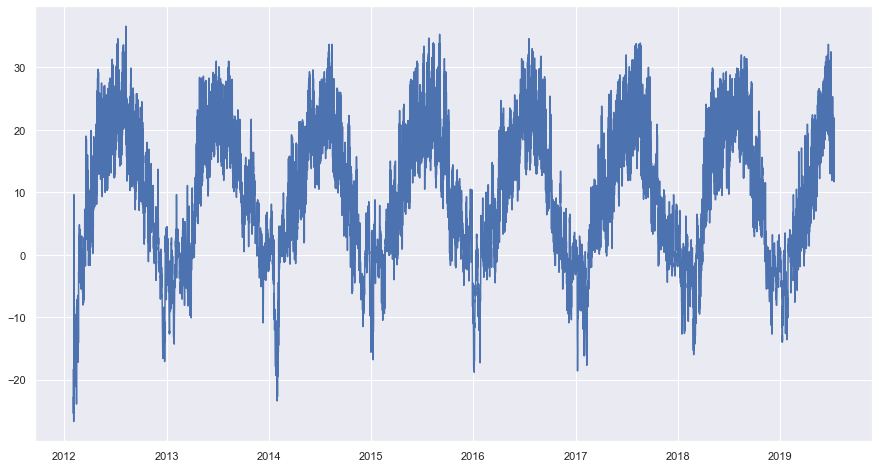

In [413]:
plt.plot(df_numeric["Local time in Kiev / Zhuliany (airport)"],df_numeric["T"])
plt.show()

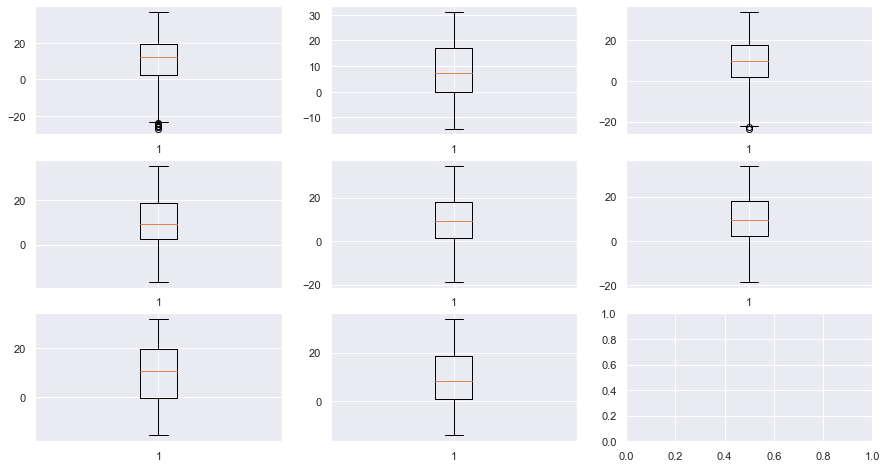

In [414]:
fig, axs = plt.subplots(3, 3)
df_year=df_numeric.groupby(df_numeric["Local time in Kiev / Zhuliany (airport)"].dt.year)
r=c=0
for i in range(2012,2020):
    axs[r,c].boxplot(df_year.get_group(i)['T'])
    c+=1
    if c==3:
        c=0
        r+=1 

In [415]:
def plt_temp_hist(i,max_array,min_array,median_array):
    df_year.get_group(i)['T']
    df_temp = df_year.get_group(i)["Local time in Kiev / Zhuliany (airport)"].dt.month
    df_temp.columns = ["Month"]
    df_temp = pd.DataFrame(df_temp)
    df_temp.rename(columns = {"Local time in Kiev / Zhuliany (airport)": "Month"}, inplace = True)
    df_temp_full = df_year.get_group(i)
    df_concat_i = pd.concat([df_temp_full, df_temp], axis=1)
    plt.subplot(3, 3, i-2012+1)
    plt.stem(df_concat_i.groupby("Month").mean()["T"])
    max_array.append(df_concat_i.groupby("Month").max()["T"])
    min_array.append(df_concat_i.groupby("Month").min()["T"])
    median_array.append(df_concat_i.groupby("Month").median()["T"])

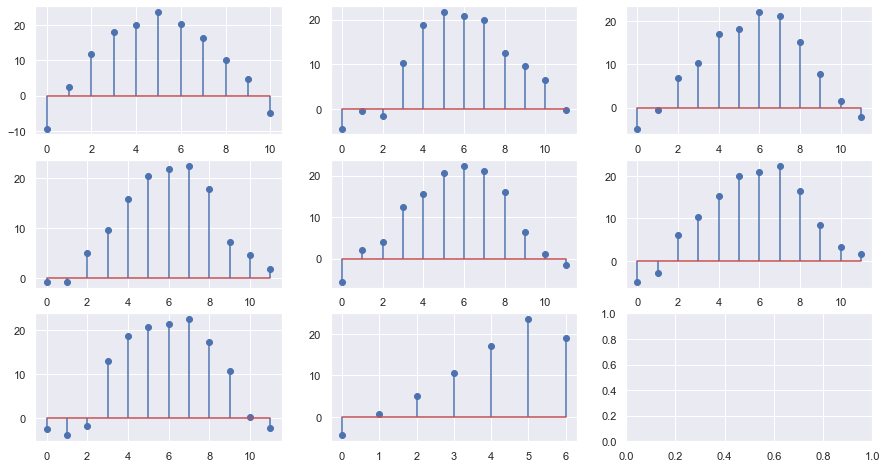

In [416]:
figure, axs = plt.subplots(3, 3)
max_array=[]
min_array=[]
median_array=[]
for i in range(2012,2020):
    plt_temp_hist(i,max_array,min_array,median_array)

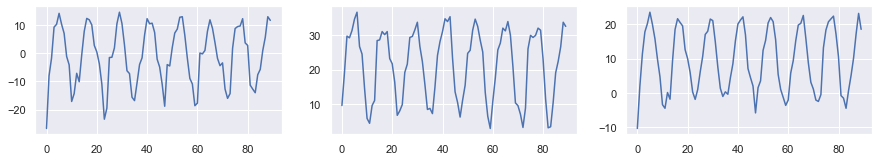

In [417]:
flat_min=[]
for i in min_array:
    for j in i:
        flat_min.append(j)
plt.subplot(3, 3, 1)
plt.plot(flat_min)
flat_max=[]
for i in max_array:
    for j in i:
        flat_max.append(j)
plt.subplot(3, 3, 2)
plt.plot(flat_max)
flat_median=[]
for i in median_array:
    for j in i:
        flat_median.append(j)
plt.subplot(3, 3, 3)
plt.plot(flat_median)

In [418]:
for i in df_numeric.columns:
    if df_numeric[i].isnull().sum()>0:
        print(i)

Po
P
Pa
U
Ff
ff10
ff3
Tn
Tx
VV
Td
RRR
tR
Tg


In [419]:
df_numeric['P'].fillna(df_numeric['P'].mean(), inplace = True)
df_numeric['U'].fillna(df_numeric['T'].mean(), inplace = True)
df_numeric['Ff'].fillna(df_numeric['Ff'].mean(), inplace = True)

In [420]:
df_numeric['Pa'].unique()

array([ nan,  1.2,  0.6,  0.9,  0. ,  0.7,  1. ,  1.1,  0.3,  0.4,  0.1,
        0.8, -0.1, -0.3, -0.2, -1.7, -1.1, -1. , -1.2, -2.3, -0.5, -0.7,
       -1.3, -1.5, -0.6, -1.6, -1.4,  0.2,  1.3,  0.5,  1.7,  1.4, -0.9,
       -0.8, -2. , -2.2, -1.8,  2.3, -0.4, -1.9,  1.6,  2. ,  2.1,  2.7,
       -2.4, -3.5, -3. ,  1.9,  2.4,  2.2,  1.5, -2.1,  1.8, -2.7, -3.6,
       -2.6,  3.6,  2.6,  2.5,  3.3,  3.2,  3.9,  3. , -2.5, -3.3,  4.4,
        3.7, -2.8, -3.9, -5.1,  2.9,  2.8, -3.2,  4.6, -2.9,  3.4,  3.1,
        3.5,  4. , -4.3, -3.1, -3.8, -3.7,  4.3])

In [421]:
df_numeric['Pa'].fillna(0, inplace = True)

In [422]:
print(df_numeric['ff3'].unique())
df_numeric[df_numeric['ff3'].isna()==False].index

[nan 18. 19. 20.]


Int64Index([  421,   425,   427,  3638,  3640,  4157,  6493,  6513,  9605,
             9669, 10237, 12642, 12866, 17482, 18316, 18460, 21066, 21068],
           dtype='int64')

In [423]:
df_numeric.drop(['ff3'], axis=1, inplace=True)

In [424]:
print(df_numeric['Tn'].isna().sum())
df[df['Tn'].isna()==False].index

19329


Int64Index([    6,    14,    22,    30,    38,    46,    54,    62,    70,
               78,
            ...
            21989, 21997, 22005, 22013, 22021, 22029, 22037, 22045, 22053,
            22061],
           dtype='int64', length=2730)

In [425]:
df_numeric['Tn'].fillna(df_numeric['Tn'].mean(), inplace = True)
df_numeric['Tx'].fillna(df_numeric['Tx'].mean(), inplace = True)
df_numeric['VV'].fillna(df_numeric['Tg'].mean(), inplace = True)
df_numeric['Td'].fillna(df_numeric['Td'].mean(), inplace = True)


In [426]:
df_numeric[(df_numeric['RRR'].isna()==False)].index

Int64Index([   17,    19,    21,    23,    25,    91,    93,    95,    97,
               99,
            ...
            21940, 21996, 22010, 22012, 22016, 22044, 22050, 22052, 22054,
            22056],
           dtype='int64', length=2297)

In [427]:
df_numeric[df_numeric['tR'].isna()==False].index

Int64Index([    5,    17,    19,    21,    23,    25,    91,    93,    95,
               97,
            ...
            21996, 22008, 22010, 22012, 22016, 22044, 22050, 22052, 22054,
            22056],
           dtype='int64', length=3287)

In [428]:
df_numeric['tR'].fillna(0, inplace = True)
df_numeric['RRR'].fillna(0, inplace = True)

In [429]:
print(df_numeric['Tg'].isna().sum())
df_numeric['Tg'].unique()

21774


array([nan,  2.,  3.,  4., -1.,  1.,  5.,  0., -2., -5., -3., -6.,  9.,
        8., 16., 15., 13.,  6., 11., -7., -8., -4.])

In [430]:
df_numeric['Tg'].fillna(df_numeric['Tg'].mean(), inplace = True)

In [431]:
df_numeric.corr()

,T,Po,P,Pa,U,Ff,ff10,N,Tn,Tx,Nh,VV,Td,RRR,tR,Tg
T,1.000000,-0.210218,-0.298550,-0.072461,-0.562096,-0.066250,-0.027540,-0.287663,3.426792e-01,3.414239e-01,-0.322116,0.434122,0.880096,-0.019365,-0.139111,3.542395e-02
Po,-0.210218,1.000000,0.995577,0.059311,-0.098078,-0.209856,0.864126,-0.219315,-8.322952e-02,-7.362576e-02,-0.174101,0.063931,-0.300286,-0.157839,-0.168835,-4.265411e-02
P,-0.298550,0.995577,1.000000,0.064002,-0.045495,-0.197817,0.875591,-0.187767,-1.140193e-01,-1.037753e-01,-0.140472,0.022677,-0.376678,-0.152628,-0.152191,-4.500007e-02
Pa,-0.072461,0.059311,0.064002,1.000000,0.104740,-0.020480,0.097590,-0.026832,1.296223e-02,1.229822e-02,0.017500,0.041244,-0.005685,0.035155,0.109245,-4.495881e-04
U,-0.562096,-0.098078,-0.045495,0.104740,1.000000,-0.126972,-0.015861,0.412626,-1.297279e-01,-1.914455e-01,0.409699,-0.668168,-0.114863,0.173562,0.258254,6.965950e-04
Ff,-0.066250,-0.209856,-0.197817,-0.020480,-0.126972,1.000000,-1.000000,0.184052,-3.380596e-02,-8.027127e-02,0.189137,0.078079,-0.153194,0.030743,0.060626,8.696882e-03
ff10,-0.027540,0.864126,0.875591,0.097590,-0.015861,-1.000000,1.000000,-0.570352,NaN,6.458160e-01,-0.570352,NaN,0.103729,-0.333333,-0.333333,NaN
N,-0.287663,-0.219315,-0.187767,-0.026832,0.412626,0.184052,-0.570352,1.000000,-1.003696e-01,-1.203138e-01,0.848236,-0.373930,-0.123358,0.118106,0.226370,1.454904e-02
Tn,0.342679,-0.083230,-0.114019,0.012962,-0.129728,-0.033806,NaN,-0.100370,1.000000e+00,-2.380427e-16,-0.102303,0.160752,0.352468,0.000137,-0.103788,1.079392e-01
Tx,0.341424,-0.073626,-0.103775,0.012298,-0.191446,-0.080271,0.645816,-0.120314,-2.380427e-16,1.000000e+00,-0.140159,0.155096,0.307569,-0.011576,-0.145780,2.125540e-16


<AxesSubplot:>

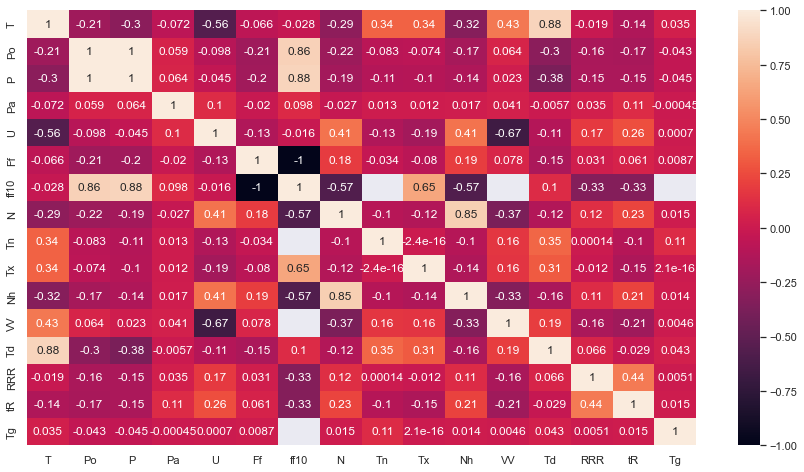

In [432]:
df_num=df_numeric.select_dtypes(include=['int64','float64'])
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_num.corr(),annot=True)

In [433]:
# figsize = (50,50)
# sns.pairplot(df_numeric)
# plt.show()

In [434]:
print(df_numeric['ff10'].unique())
print(df_numeric[df_numeric['ff10'].isna()==False].index)

[nan 18. 19.]
Int64Index([9669, 18316, 18460, 21066], dtype='int64')


In [435]:
df_numeric.drop(['ff10'],axis=1,inplace=True)
df_numeric.drop(['Po'],axis=1,inplace=True)
df_num=df_numeric.select_dtypes(include=['int64','float64'])

In [437]:
from numpy.linalg import eig
cov_matrix= df_num.to_numpy()
# print(df_num)
# print(cov_matrix[0])
cov_matrix = np.cov(cov_matrix.T)
# print(cov_matrix[0])
eigenvalues, eigenvectors = eig(cov_matrix)